#Problem Statement
**Can we assess whether a loan will be approved or declined based on the data input by an applicant during the online application, including both the applicant's and loan information?**


#Data Collection

Dataset downloaded here: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [158]:
import pandas as pd
import numpy as np

df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
df.shape

(614, 13)

#Preprocessing

##Dealing with the missing value

In [160]:
df = df.drop(columns=['Loan_ID'])

In [161]:
# examine missing values
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 0:
        print(f"Column '{column}' has {missing_values} missing values.")
    else:
        print(f"Column '{column}' has no missing values.")

Column 'Gender' has 13 missing values.
Column 'Married' has 3 missing values.
Column 'Dependents' has 15 missing values.
Column 'Education' has no missing values.
Column 'Self_Employed' has 32 missing values.
Column 'ApplicantIncome' has no missing values.
Column 'CoapplicantIncome' has no missing values.
Column 'LoanAmount' has 22 missing values.
Column 'Loan_Amount_Term' has 14 missing values.
Column 'Credit_History' has 50 missing values.
Column 'Property_Area' has no missing values.
Column 'Loan_Status' has no missing values.


In [162]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [163]:
# use median to replace the missing value because it is more robust to the outliers
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [164]:
# see if there is any outliers in the Loan_Amount_Term column
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [165]:
# it has some outliers, so we use median to replace the missing value
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(),inplace=True)

In [166]:
# examine missing values
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 0:
        print(f"Column '{column}' has {missing_values} missing values.")
    else:
        print(f"Column '{column}' has no missing values.")

Column 'Gender' has no missing values.
Column 'Married' has no missing values.
Column 'Dependents' has no missing values.
Column 'Education' has no missing values.
Column 'Self_Employed' has no missing values.
Column 'ApplicantIncome' has no missing values.
Column 'CoapplicantIncome' has no missing values.
Column 'LoanAmount' has no missing values.
Column 'Loan_Amount_Term' has no missing values.
Column 'Credit_History' has no missing values.
Column 'Property_Area' has no missing values.
Column 'Loan_Status' has no missing values.


##Examine data distribution

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


1.0    525
0.0     89
Name: Credit_History, dtype: int64


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64




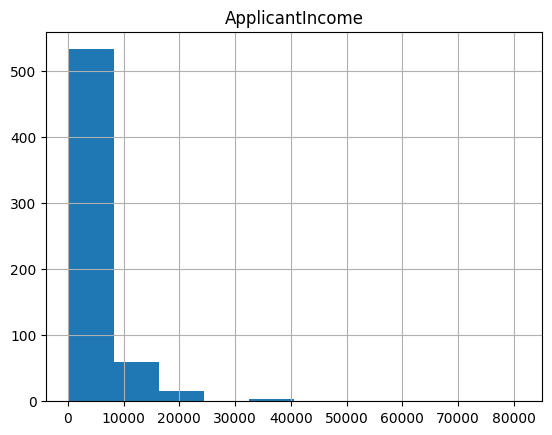

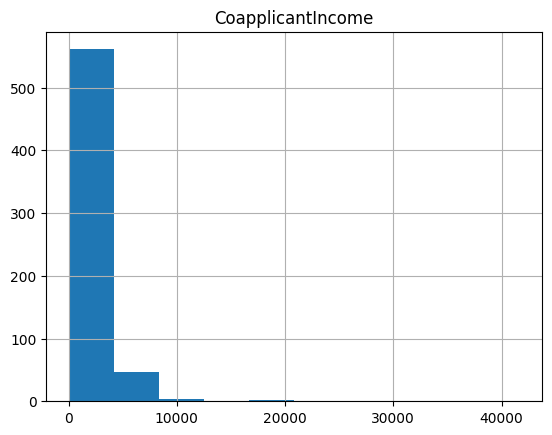

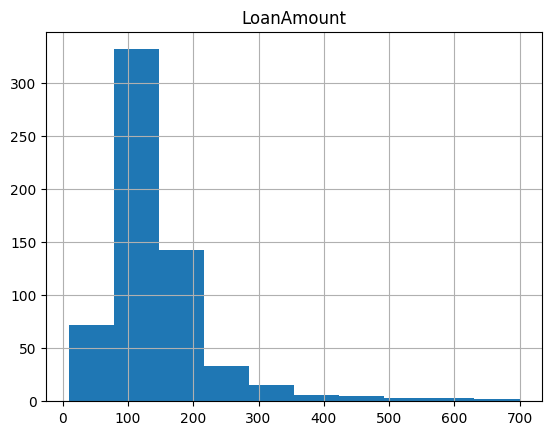

In [167]:
import matplotlib.pyplot as plt

# For categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
for col in categorical_columns:
    print(df[col].value_counts())
    print("\n")

# For numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[numerical_columns].describe()

# Optionally, plot histograms for numerical columns
for col in numerical_columns:
    df[col].hist()
    plt.title(col)
    plt.show()

## Encode the labels

In [168]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [170]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,N
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,Y
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,8,1,0,Y
610,1,1,3,0,0,4106,0.0,40.0,5,1,0,Y
611,1,1,1,0,0,8072,240.0,253.0,8,1,2,Y
612,1,1,2,0,0,7583,0.0,187.0,8,1,2,Y


"Gender": Male - 1, Female - 0

"Property_Area": Rural - 0, Semiurban - 1, Urban - 2

Others: Yes - 1, No - 0

In [171]:
# encode the target variable
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [172]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,8,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,5,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,8,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,8,1,2,1


Y - 1, N - 0

In [173]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object

##Split the data

In [174]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Loan_Status")
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [175]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,8,1,2
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2
4,1,0,0,0,0,6000,0.0,141.0,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,8,1,0
610,1,1,3,0,0,4106,0.0,40.0,5,1,0
611,1,1,1,0,0,8072,240.0,253.0,8,1,2
612,1,1,2,0,0,7583,0.0,187.0,8,1,2


In [176]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## Standardization

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numerical_columns])

# Transform both training and testing data
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [178]:
X_train = X_train.values
X_test = X_test.values

#Modeling

Choice of evaluation methods:

In the context of assessing loan approvals, I have chosen to focus on Precision and Recall, and their balance as represented by the F1 Score, rather than solely on Accuracy. This decision is driven by the specific nature and implications of loan approval predictions. Accuracy, while providing an overall success rate, can be misleading in cases of imbalanced datasets where one class (approved or declined) significantly outweighs the other. Precision is crucial in this scenario as it reflects the ability of the model to correctly identify true loan approvals, minimizing the risk of approving unqualified applicants. Recall, on the other hand, ensures that genuinely eligible applicants are not denied, maintaining the integrity and inclusiveness of the loan process. The F1 Score harmonizes these two metrics, offering a single measure that balances the need to minimize false positives (approving bad loans) and false negatives (rejecting good loans). This balanced approach is essential in the financial domain, where both types of errors carry significant consequences.

##KNN

In [179]:
# helper functions
def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNN():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

In [180]:
knn = KNN(k=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [181]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision_knn = precision_score(y_test, predictions)

# Recall
recall_knn = recall_score(y_test, predictions)

# F1 Score
f1_knn = f1_score(y_test, predictions)

print(f"Precision (KNN): {precision_knn}")
print(f"Recall (KNN): {recall_knn}")
print(f"F1 Score (KNN): {f1_knn}")

Precision (KNN): 0.7924528301886793
Recall (KNN): 0.9333333333333333
F1 Score (KNN): 0.8571428571428572


###Summary
KNN is a simple, non-parametric algorithm used for classification and regression. It predicts based on the majority vote or average of the 'k' nearest neighbors.

**Pros:**
* Simple and easy to implement.
* No assumptions about data distribution.
* Versatile for both classification and regression.

**Cons:**
* Computationally intensive with large datasets.
* Sensitive to irrelevant features and imbalanced data.
* Memory intensive, as it requires storing the entire dataset.

**Main Hyperparameters:**
* Number of Neighbors (k): Determines how many neighbors influence the prediction.
* Distance Metric: Such as Euclidean or Manhattan, to measure proximity.
* Weights: To decide if all neighbors contribute equally or not.

##SVM

In [182]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [183]:
from sklearn.metrics import precision_recall_fscore_support
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Precision (SVM): {precision_svm}")
print(f"Recall (SVM): {recall_svm}")
print(f"F1 Score (SVM): {f1_svm}")

Precision (SVM): 0.8301886792452831
Recall (SVM): 0.9777777777777777
F1 Score (SVM): 0.8979591836734695


###Summary
SVM is a powerful, versatile machine learning algorithm used for classification and regression, known for its ability to handle high-dimensional data and perform well on a variety of datasets.

**Pros:**
* Effective in high-dimensional spaces.
* Works well with a clear margin of separation and is robust against overfitting.
* Versatile through the use of different kernel functions.

**Cons:**
* Not suitable for large datasets due to its high training time.
* Less effective on noisier datasets with overlapping classes.
* Requires careful tuning of hyperparameters and kernel choice.

**Main Hyperparameters:**
* Kernel: The function used to map a lower-dimensional data into a higher-dimensional space (e.g., linear, polynomial, radial basis function (RBF)).
* C (Regularization parameter): Controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights.
* Gamma: Defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close' (for non-linear kernels).

## Decision Tree

In [184]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model using Precision, Recall, and F1 Score
precision_dt, recall_dt, f1_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='binary')

print(f"Precision (Decision Tree): {precision_dt}")
print(f"Recall (Decision Tree): {recall_dt}")
print(f"F1 Score (Decision Tree): {f1_dt}")

Precision (Decision Tree): 0.7974683544303798
Recall (Decision Tree): 0.7
F1 Score (Decision Tree): 0.7455621301775147


### Summary
Decision Trees are versatile algorithms used for both classification and regression tasks. They model decisions and their possible consequences by creating a tree-like graph of choices.

**Pros:**
- Easy to understand and interpret.
- Requires little data preparation (no need for normalization, dummy variables).
- Can handle both numerical and categorical data.

**Cons:**
- Prone to overfitting, especially with complex trees.
- Can be unstable, as small variations in data might result in a completely different tree.
- Biased with imbalanced datasets.

**Main Hyperparameters:**
- `max_depth`: The maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `criterion`: The function to measure the quality of a split (e.g., 'gini' for Gini impurity and 'entropy' for information gain).


##Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')
print(f"Precision (Random Forest): {precision_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1 Score (Random Forest): {f1_rf}")

Precision (Random Forest): 0.82
Recall (Random Forest): 0.9111111111111111
F1 Score (Random Forest): 0.8631578947368421


### Summary
Random Forest is an ensemble learning method, primarily used for classification and regression. It builds multiple decision trees and merges them together to get a more accurate and stable prediction.

**Pros:**
- High accuracy and robustness, performs well on many problems, including non-linear.
- Effective for large datasets and handles high-dimensional data well.
- Better at handling overfitting compared to individual decision trees.

**Cons:**
- Slower training time, especially with a large number of trees.
- Less interpretable than a single decision tree.
- Can overfit on very noisy datasets.

**Main Hyperparameters:**
- `n_estimators`: The number of trees in the forest.
- `max_depth`: The maximum depth of the trees.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `bootstrap`: Whether bootstrap samples are used when building trees.

##Gradient Boosting

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

precision_gb, recall_gb, f1_gb, _ = precision_recall_fscore_support(y_test, y_pred_gb, average='binary')
print(f"Precision (Gradient Boosting): {precision_gb}")
print(f"Recall (Gradient Boosting): {recall_gb}")
print(f"F1 Score (Gradient Boosting): {f1_gb}")

Precision (Gradient Boosting): 0.8235294117647058
Recall (Gradient Boosting): 0.9333333333333333
F1 Score (Gradient Boosting): 0.8749999999999999


### Summary
Gradient Boosting is an ensemble learning technique that builds models sequentially, with each new model attempting to correct the errors of the previous ones. It's widely used for both classification and regression tasks.

**Pros:**
- Often provides high predictive accuracy.
- Flexible, can optimize on different loss functions and provides several hyperparameter tuning options.
- Handles different types of predictor variables and accommodates missing data.

**Cons:**
- Prone to overfitting if the data is noisy or the number of trees is too large.
- Can be computationally expensive and time-consuming to train, especially with large datasets.
- Requires careful tuning of hyperparameters and selection of an appropriate stopping point for tree growth.

**Main Hyperparameters:**
- `n_estimators`: The number of boosting stages to be run.
- `learning_rate`: Shrinks the contribution of each tree by this value.
- `max_depth`: The maximum depth of the individual regression estimators.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.


#Hyperparameter Tuning

##Decision Tree Hyperparameter Tuning

In [189]:
from sklearn.model_selection import GridSearchCV
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1 score for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best F1 score for Decision Tree: 0.8018928249390583


##Gradient Boosting Hyperparameter Tuning

In [190]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='f1')
grid_search_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best F1 score for Gradient Boosting:", grid_search_gb.best_score_)

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best F1 score for Gradient Boosting: 0.8645936933416378


#Results

In [194]:
results = {
    "Model": ["KNN", "SVM", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Hyperparameters": ["default", "default", str(grid_search_dt.best_params_), "default", str(grid_search_gb.best_params_)],
    "F1 Score": [f1_knn, f1_svm, grid_search_dt.best_score_, f1_rf, grid_search_gb.best_score_]
}

df_results = pd.DataFrame(results)
df_results

,Model,Hyperparameters,F1 Score
0,KNN,default,0.857143
1,SVM,default,0.897959
2,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.801893
3,Random Forest,default,0.863158
4,Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.864594


In [202]:
df_results.to_csv('result.csv', index=False)

To a significant extent, the project successfully addressed the initial question of whether it is possible to assess loan approval based on applicant and loan information. Among the models evaluated, the Support Vector Machine (SVM) demonstrated superior performance with an F1 score of 0.898. SVM's capability to handle intricate decision boundaries and capture nuanced relationships in the data played a crucial role in achieving this outcome.

## Feature Importance

### Decision Tree

In [195]:
feature_names = X.columns
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [196]:
importances_dt = decision_tree_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices_dt[f]]} ({importances_dt[indices_dt[f]]})")

Feature ranking:
1. Feature Credit_History (0.2945244001328675)
2. Feature LoanAmount (0.2072030716702568)
3. Feature ApplicantIncome (0.1951535781472504)
4. Feature CoapplicantIncome (0.12217988763362846)
5. Feature Dependents (0.04962115032794973)
6. Feature Loan_Amount_Term (0.03812505893836028)
7. Feature Married (0.03738670208994397)
8. Feature Property_Area (0.026965278677266474)
9. Feature Self_Employed (0.014572124977899016)
10. Feature Education (0.014268747404577361)
11. Feature Gender (0.0)


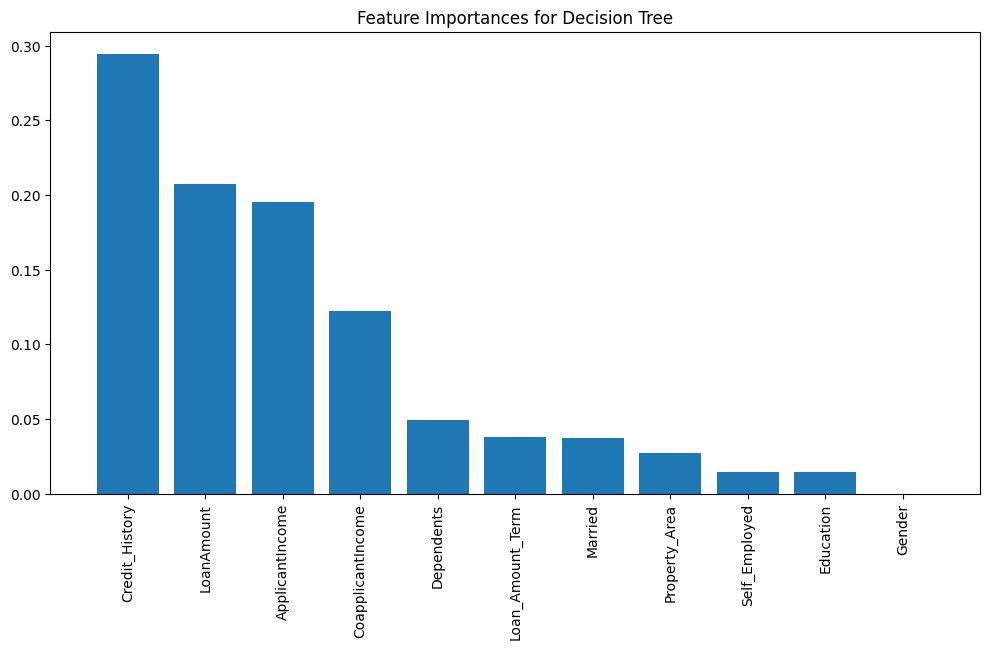

In [197]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Decision Tree")
plt.bar(range(X_train.shape[1]), importances_dt[indices_dt], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_dt], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

###Random Forest

In [198]:
importances_rf = random_forest_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices_rf[f]]} ({importances_rf[indices_rf[f]]})")

Feature ranking:
1. Feature Credit_History (0.2561722752983594)
2. Feature ApplicantIncome (0.22161755398165076)
3. Feature LoanAmount (0.18247473909380987)
4. Feature CoapplicantIncome (0.1166039403522941)
5. Feature Dependents (0.04999342661370286)
6. Feature Property_Area (0.04849789289010391)
7. Feature Loan_Amount_Term (0.0398131982304461)
8. Feature Married (0.024274480273385607)
9. Feature Education (0.02420456263220715)
10. Feature Self_Employed (0.019873548257857355)
11. Feature Gender (0.01647438237618302)


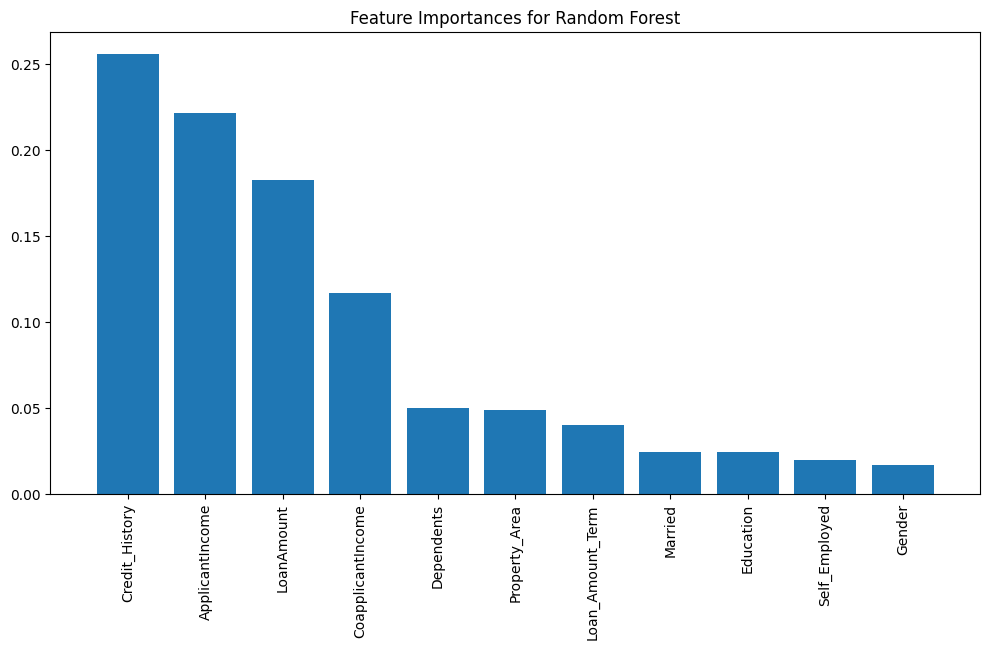

In [199]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

###Gradient Boosting

In [200]:
importances_gb = gradient_boosting_model.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices_gb[f]]} ({importances_gb[indices_gb[f]]})")

Feature ranking:
1. Feature Credit_History (0.4713211511981127)
2. Feature LoanAmount (0.16650297143294585)
3. Feature ApplicantIncome (0.15585064325503065)
4. Feature CoapplicantIncome (0.09134808758158562)
5. Feature Property_Area (0.037042549194887135)
6. Feature Loan_Amount_Term (0.03539022106108805)
7. Feature Dependents (0.017108694873661227)
8. Feature Married (0.01143007164507602)
9. Feature Self_Employed (0.00847836961500949)
10. Feature Education (0.004919189155398593)
11. Feature Gender (0.0006080509872046973)


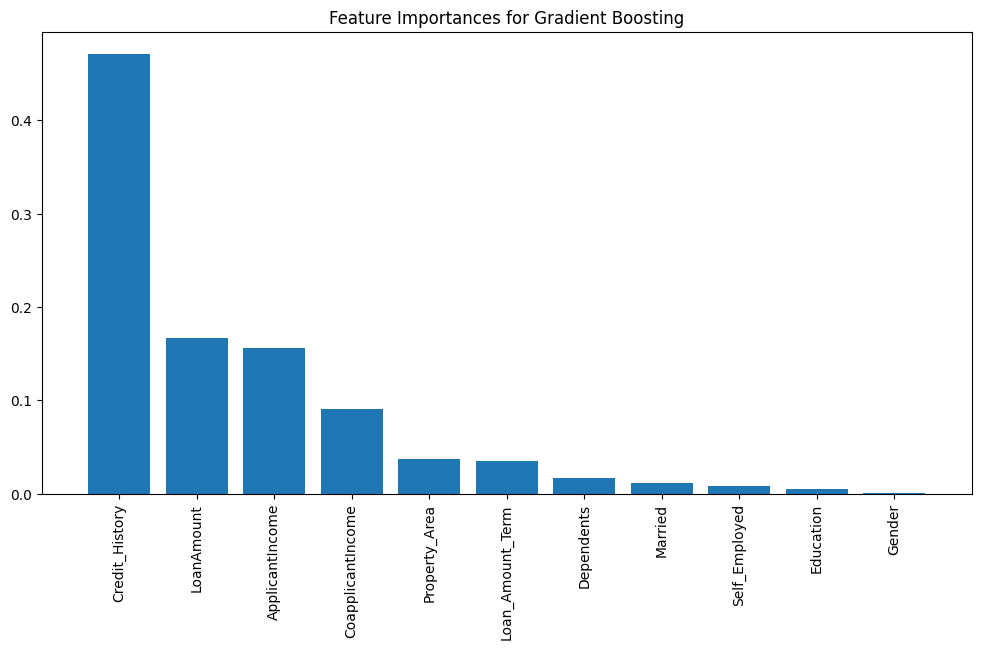

In [201]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances_gb[indices_gb], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_gb], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

###Conclusion for the feature importance
From the plots above, we can conclude that credit history, loan amount, applicant income, and coapplicant income are the most important features used in the classifications.